In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("../recursos_humanos.csv")
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [34]:
# Aplicar pd.get_dummies para convertir las variables categóricas en variables dummy/indicadoras
data_encoded = pd.get_dummies(data, columns=['sales', 'salary'])
data_encoded = data_encoded.astype(int)
data_encoded.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0,0,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,0,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [38]:
# Normalización Min-Max
scaler = MinMaxScaler()
data_encoded[data_encoded.columns] = scaler.fit_transform(data_encoded)

# Separar características y etiqueta objetivo
X = data_encoded.drop('left', axis=1)
y = data_encoded['left']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
# Estandarizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

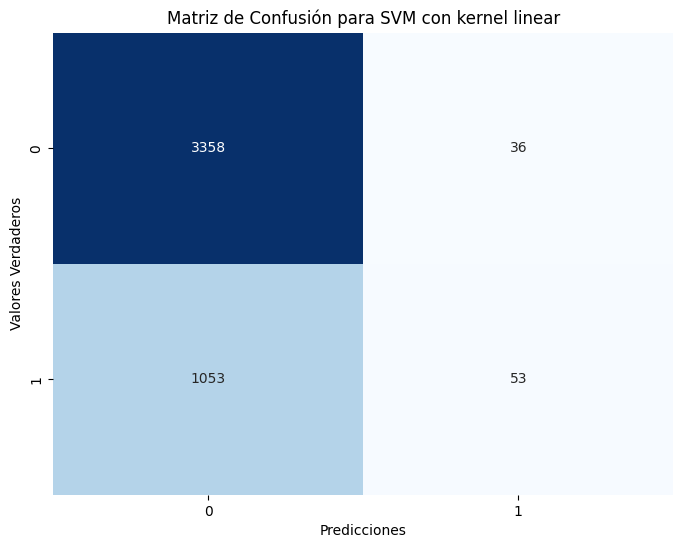

Reporte de clasificación para SVM con kernel linear:

              precision    recall  f1-score   support

         0.0       0.76      0.99      0.86      3394
         1.0       0.60      0.05      0.09      1106

    accuracy                           0.76      4500
   macro avg       0.68      0.52      0.47      4500
weighted avg       0.72      0.76      0.67      4500



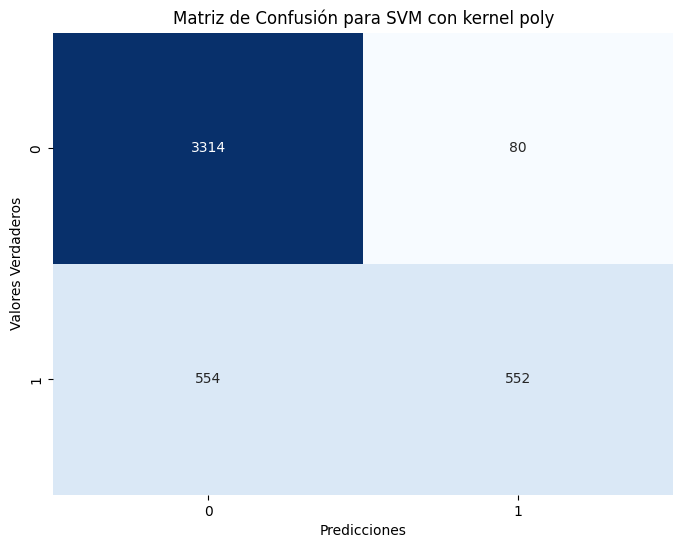

Reporte de clasificación para SVM con kernel poly:

              precision    recall  f1-score   support

         0.0       0.86      0.98      0.91      3394
         1.0       0.87      0.50      0.64      1106

    accuracy                           0.86      4500
   macro avg       0.87      0.74      0.77      4500
weighted avg       0.86      0.86      0.84      4500



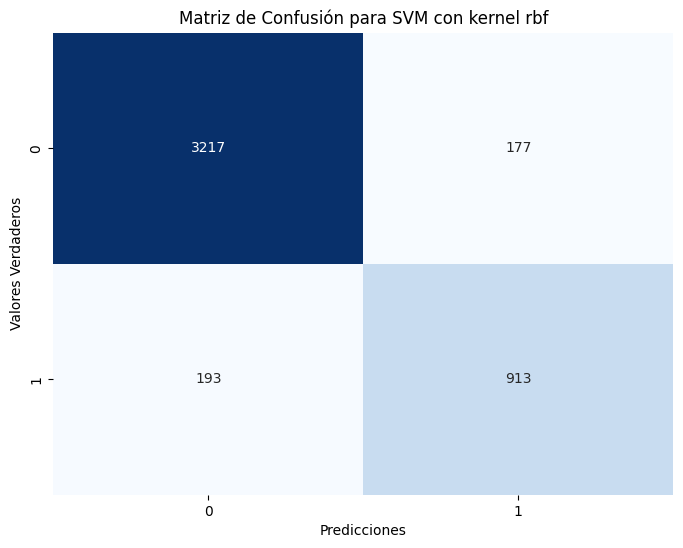

Reporte de clasificación para SVM con kernel rbf:

              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95      3394
         1.0       0.84      0.83      0.83      1106

    accuracy                           0.92      4500
   macro avg       0.89      0.89      0.89      4500
weighted avg       0.92      0.92      0.92      4500



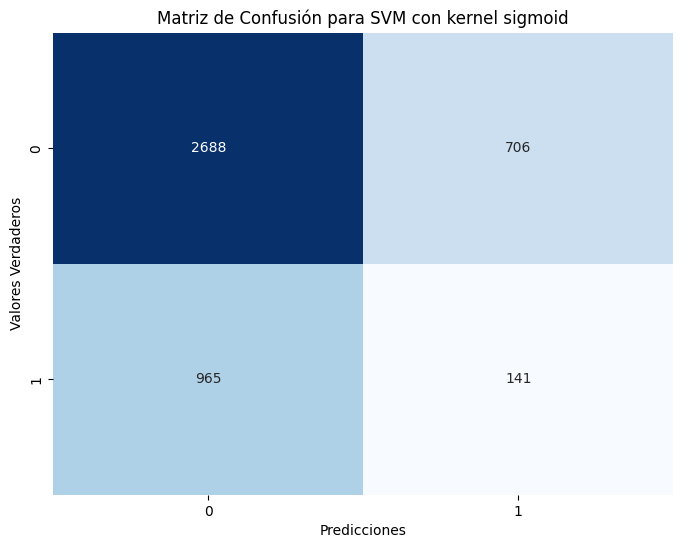

Reporte de clasificación para SVM con kernel sigmoid:

              precision    recall  f1-score   support

         0.0       0.74      0.79      0.76      3394
         1.0       0.17      0.13      0.14      1106

    accuracy                           0.63      4500
   macro avg       0.45      0.46      0.45      4500
weighted avg       0.60      0.63      0.61      4500



In [39]:
# Función para entrenar y evaluar un modelo SVM con un kernel dado
def train_evaluate_svm(kernel_type):
    svm_model = SVC(kernel=kernel_type, random_state=2)
    svm_model.fit(X_train_scaled, y_train)
    y_pred = svm_model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred, output_dict=True)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.title(f'Matriz de Confusión para SVM con kernel {kernel_type}')
    plt.xlabel('Predicciones')
    plt.ylabel('Valores Verdaderos')
    plt.show()
    
    print(f"Reporte de clasificación para SVM con kernel {kernel_type}:\n")
    print(classification_report(y_test, y_pred))

# Entrenar y evaluar con diferentes kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    train_evaluate_svm(kernel)

Los resultados indican que los kernels polinómico y RBF ofrecen el mejor rendimiento global, con un equilibrio muy bueno entre precisión y recall para ambas clases. El kernel lineal muestra un rendimiento moderado, mientras que el kernel sigmoidal presenta un rendimiento sustancialmente inferior.